In [1]:
import numpy as np
import matplotlib.pyplot as plt
import cv2

import tracker
import stats
import visualizer
import utils

import importlib

import os

In [83]:
video_fn = "./ExampleVideos/11.mp4"
visem_fn = "./ExampleVideos/11_bbox.csv"
trackpy_fn = "./ExampleVideos/11_trackpy_keep.csv"

frames = utils.loadVideo(video_fn)
visem = utils.loadDataFrame(visem_fn)
gt = utils.loadDataFrame(trackpy_fn)

# Convert dataframe "frames" to int
gt = gt.astype({"frame": int, "sperm": int})
gt = utils.interpolateTracks(gt)

# Get video dimensions
num_frames, rows, cols, ch = frames.shape


In [8]:
visualizer.runVisualization(video_fn, visem, "flow")
visualizer.runVisualization(video_fn, gt, "flow")

(57, 3)
Video Finished.
(1441, 3)
Video Finished.


In [84]:

def extractTrajectory(df, sperm_id):

    sperm = df[df["sperm"] == sperm_id]

    # Sort the sperm by frame
    sperm = sperm.sort_values(by="frame")

    # Get the sperm trajectory
    sperm = sperm[["frame", "x", "y"]].to_numpy()

    return sperm

trackpy_ids = [5,7,36,90]
visem_ids = [40,29,34,15]

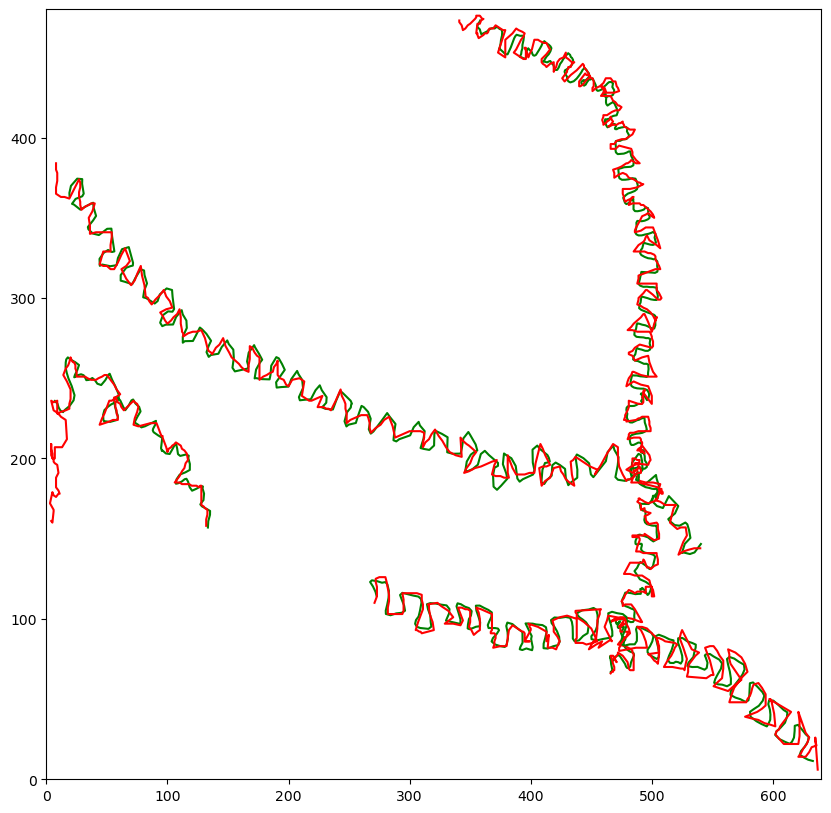

In [94]:
# Visualize the sperm trajectories
import matplotlib.pyplot as plt
from matplotlib.lines import Line2D

fig = plt.figure(figsize=(10, 10))
ax = fig.add_subplot(111)
ax.set_xlim(0, cols)
ax.set_ylim(0, rows)

for i in range(len(trackpy_ids)):
    sperm_id = trackpy_ids[i]
    visem_id = visem_ids[i]

    # Extract the sperm trajectory
    sperm_traj = extractTrajectory(gt, sperm_id)
    visem_traj = extractTrajectory(visem, visem_id)

    line1 = Line2D(sperm_traj[:-1, 1], rows-sperm_traj[:-1, 2], color='green', label='Ground Truth')
    line2 = Line2D(visem_traj[:-1, 1], rows-visem_traj[:-1, 2], color='red', label='Visem')

    ax.add_line(line1)
    ax.add_line(line2)

plt.show()

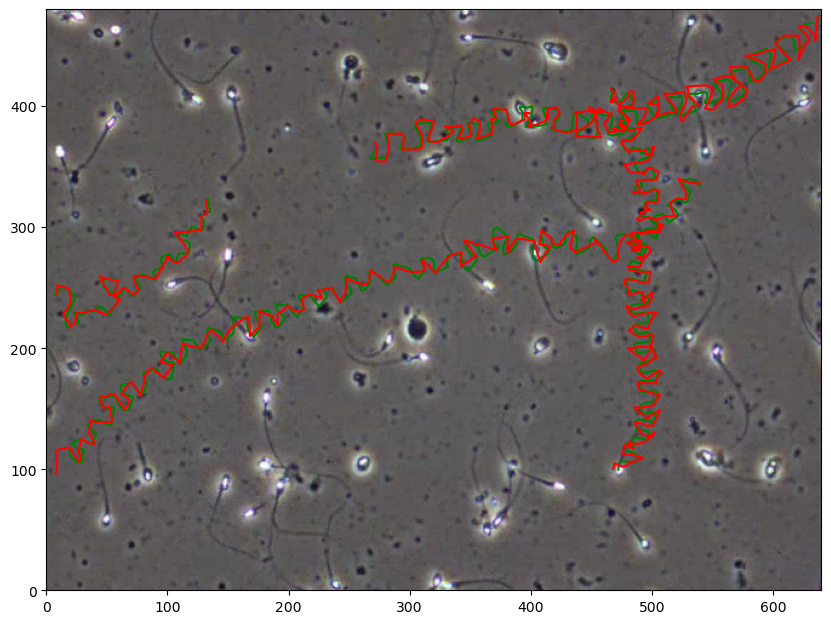

In [98]:
# Visualize the sperm trajectories
import matplotlib.pyplot as plt
from matplotlib.lines import Line2D

last_frame = 479

image = frames[last_frame].copy()
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

fig = plt.figure(figsize=(10, 10))
ax = fig.add_subplot(111)
ax.imshow(image)
ax.set_xlim(0, cols)
ax.set_ylim(0, rows)

#
#for i in [2]:
for i in range(len(trackpy_ids)):
    sperm_id = trackpy_ids[i]
    visem_id = visem_ids[i]

    # Extract the sperm trajectory
    sperm_traj = extractTrajectory(gt, sperm_id)
    visem_traj = extractTrajectory(visem, visem_id)

    # Adhoc filter for missing frame
    if sperm_id == 7:
        sperm_traj = sperm_traj[sperm_traj[:, 0] <= 130]
        visem_traj = visem_traj[visem_traj[:, 0] <= 130]
        

    # Filter everything up to the last frame
    sperm_traj = sperm_traj[sperm_traj[:, 0] <= last_frame]
    visem_traj = visem_traj[visem_traj[:, 0] <= last_frame]

    line1 = Line2D(sperm_traj[:-1, 1], sperm_traj[:-1, 2], color='green', label='Ground Truth')
    line2 = Line2D(visem_traj[:-1, 1], visem_traj[:-1, 2], color='red', label='Visem')

    ax.add_line(line1)
    ax.add_line(line2)

plt.show()

[34, 36]
468
100
472.292297671389
99.60104217554144


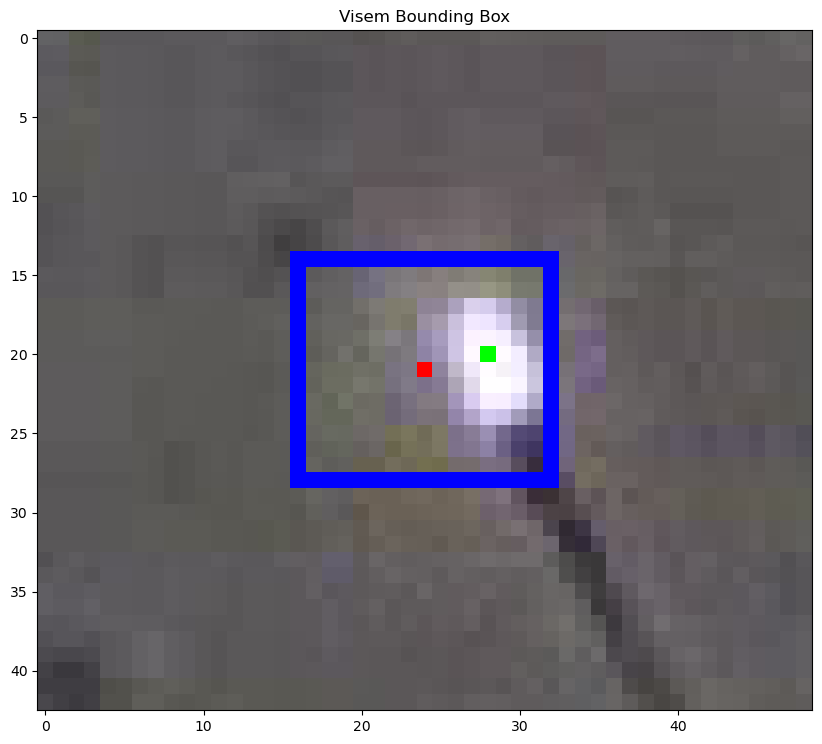

In [111]:
# Visualize bounding box vs ground truth

sperm_num = 2

print([visem_ids[sperm_num], trackpy_ids[sperm_num]])

last_frame = 478

current = visem[visem["frame"] == last_frame]

current = current[current["sperm"] == visem_ids[sperm_num]]

gt_answer = gt[gt["frame"] == last_frame]
gt_answer = gt_answer[gt_answer["sperm"] == trackpy_ids[sperm_num]]

y = current.iloc[0]["y"]
x = current.iloc[0]["x"]
h = current.iloc[0]["bbox_h"]
w = current.iloc[0]["bbox_w"]

gt_x = gt_answer.iloc[0]["x"]
gt_y = gt_answer.iloc[0]["y"]

print(x)
print(y)
print(gt_x)
print(gt_y)


# Draw bounding 
current_image = frames[last_frame].copy()
current_image = cv2.cvtColor(current_image, cv2.COLOR_BGR2RGB)
current_image = cv2.rectangle(current_image, (int(x-w), int(y-h)), (int(x+w), int(y+h)), (0, 0, 255), 1)
current_image = cv2.circle(current_image, (int(x), int(y)), 0, (255, 0, 0), -1)
current_image = cv2.circle(current_image, (int(gt_x), int(gt_y)), 0, (0, 255, 0), -1)

zm= 3 #zoom out factor
cropped_im = current_image[int(y-zm*h):int(y+zm*h+1), int(x-zm*w):int(x+zm*w+1)]

fig = plt.figure(figsize=(10, 10))
ax = fig.add_subplot(111)
ax.imshow(cropped_im)
ax.set_title("Visem Bounding Box")
plt.show()